This task for this Exercise is split into two parts:

In the first part, you’ll continue to enrich your project data using the customer data you merged in the previous task to answer key business questions from Instacart. Your goal will be to provide better insight for customer profiling in terms of ads, bonus programs, and sales information.

In the second part, you’ll create a report that communicates your analysis process and results to Instacart. The report will describe each step you took over the course of this Achievement while also sharing your results and recommendations.

# Part 1

##### 1. Import the data set you exported in Exercise 4.9 into a new Jupyter notebook. This should be the merged version of your data that contains the new customers column.

##### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy


##### Importing data: 

In [2]:
# Assign target data to 'path' and verify
path = r'/Users/peterkim/Document/sql/CareerFoundry/Immersion Prep/4. Python Fundamentals for Data Analysts/Instacart Basket Analysis'

# Importing dataframe; 'ords_prods_cstmr_merged_updated_090923.pkl'
df_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_cstmr_merged_updated_090923.pkl'))


In [57]:
# Checking dataframe, 'ords_prods_cstmr_merged_updated_090923.pkl'
df_merge.head()


,department_id,department,user_id,gender,state,age,date_joined,numb_of_dependants,marital_status,income,...,loyalty_flag,mean_price,spending_flag,order_frequency_flag,region,cust_activity,age_group,income_group,_merge,family_type
0,1,frozen,33890,Female,New Mexico,36,1/1/2017,0,single,59285,...,Regular customer,7.06,Low spender,Non-frequent customer,West,high-activity,35-44,Low-income,both,Single-family
1,1,frozen,33890,Female,New Mexico,36,1/1/2017,0,single,59285,...,Regular customer,7.06,Low spender,Non-frequent customer,West,high-activity,35-44,Low-income,both,Single-family
2,1,frozen,65803,Male,Idaho,35,1/1/2017,2,married,99568,...,New customer,8.38,Low spender,Frequent customer,West,high-activity,NaN,Low-income,both,Nuclear-family
3,1,frozen,65803,Male,Idaho,35,1/1/2017,2,married,99568,...,New customer,8.38,Low spender,Frequent customer,West,high-activity,NaN,Low-income,both,Nuclear-family
4,1,frozen,65803,Male,Idaho,35,1/1/2017,2,married,99568,...,New customer,8.38,Low spender,Frequent customer,West,high-activity,NaN,Low-income,both,Nuclear-family


##### 2. Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.
If even a single column within your data set could potentially be traced back to a particular person, then you’re working with PII. Particularly sensitive are names, email addresses, physical addresses, and phone numbers.

In [58]:
# Checking the names of all column
df_merge.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434212 entries, 0 to 32434211
Data columns (total 32 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   department_id           int64   
 1   department              object  
 2   user_id                 int64   
 3   gender                  object  
 4   state                   object  
 5   age                     int64   
 6   date_joined             object  
 7   numb_of_dependants      int64   
 8   marital_status          object  
 9   income                  int64   
 10  order_id                int64   
 11  order_number            int64   
 12  orders_day_of_week      int64   
 13  order_hour_of_day       int64   
 14  days_since_prior_order  float64 
 15  product_id              int64   
 16  add_to_cart_order       int64   
 17  reordered               int64   
 18  product_name            object  
 19  aisle_id                int64   
 20  prices                  float64 
 21  max_or

In [3]:
# Dropping 'first_name' and 'last_name' (also 'eval_set' and 'Unnamed: 0')
df_merge = df_merge.drop(columns = ['first_name', 'last_name', 'eval_set', 'Unnamed: 0'])


In [59]:
# Checking the dataset
df_merge.head()


,department_id,department,user_id,gender,state,age,date_joined,numb_of_dependants,marital_status,income,...,loyalty_flag,mean_price,spending_flag,order_frequency_flag,region,cust_activity,age_group,income_group,_merge,family_type
0,1,frozen,33890,Female,New Mexico,36,1/1/2017,0,single,59285,...,Regular customer,7.06,Low spender,Non-frequent customer,West,high-activity,35-44,Low-income,both,Single-family
1,1,frozen,33890,Female,New Mexico,36,1/1/2017,0,single,59285,...,Regular customer,7.06,Low spender,Non-frequent customer,West,high-activity,35-44,Low-income,both,Single-family
2,1,frozen,65803,Male,Idaho,35,1/1/2017,2,married,99568,...,New customer,8.38,Low spender,Frequent customer,West,high-activity,NaN,Low-income,both,Nuclear-family
3,1,frozen,65803,Male,Idaho,35,1/1/2017,2,married,99568,...,New customer,8.38,Low spender,Frequent customer,West,high-activity,NaN,Low-income,both,Nuclear-family
4,1,frozen,65803,Male,Idaho,35,1/1/2017,2,married,99568,...,New customer,8.38,Low spender,Frequent customer,West,high-activity,NaN,Low-income,both,Nuclear-family


In [60]:
# Checking the names of all column
df_merge.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434212 entries, 0 to 32434211
Data columns (total 32 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   department_id           int64   
 1   department              object  
 2   user_id                 int64   
 3   gender                  object  
 4   state                   object  
 5   age                     int64   
 6   date_joined             object  
 7   numb_of_dependants      int64   
 8   marital_status          object  
 9   income                  int64   
 10  order_id                int64   
 11  order_number            int64   
 12  orders_day_of_week      int64   
 13  order_hour_of_day       int64   
 14  days_since_prior_order  float64 
 15  product_id              int64   
 16  add_to_cart_order       int64   
 17  reordered               int64   
 18  product_name            object  
 19  aisle_id                int64   
 20  prices                  float64 
 21  max_or

##### 3. The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.
- Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions).
- Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

In [61]:
# Checking how 'state' names are written
df_merge['state']


0               New Mexico
1               New Mexico
2                    Idaho
3                    Idaho
4                    Idaho
                 ...      
32434207          Arkansas
32434208          Kentucky
32434209          Colorado
32434210            Kansas
32434211    North Carolina
Name: state, Length: 32434212, dtype: object

In [4]:
# Classifying regions
northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
midwest = ['Wisconsin', 'Michigan','Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
south = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
west = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

# Creating region column
df_merge.loc[df_merge['state'].isin (northeast), 'region'] = 'Northeast'
df_merge.loc[df_merge['state'].isin (midwest), 'region'] = 'Midwest'
df_merge.loc[df_merge['state'].isin (south), 'region'] = 'South'
df_merge.loc[df_merge['state'].isin (west), 'region'] = 'West'


In [42]:
# Checking the dataset
df_merge.head(50)


,department_id,department,user_id,gender,state,age,date_joined,numb_of_dependants,marital_status,income,...,loyalty_flag,mean_price,spending_flag,order_frequency_flag,region,cust_activity,age_group,income_group,_merge,family_type
0,1,frozen,33890,Female,New Mexico,36,1/1/2017,0,single,59285,...,Regular customer,7.06,Low spender,Non-frequent customer,West,high-activity,35-44,Low-income,both,Single-family
1,1,frozen,33890,Female,New Mexico,36,1/1/2017,0,single,59285,...,Regular customer,7.06,Low spender,Non-frequent customer,West,high-activity,35-44,Low-income,both,Single-family
2,1,frozen,65803,Male,Idaho,35,1/1/2017,2,married,99568,...,New customer,8.38,Low spender,Frequent customer,West,high-activity,NaN,Low-income,both,Nuclear-family
3,1,frozen,65803,Male,Idaho,35,1/1/2017,2,married,99568,...,New customer,8.38,Low spender,Frequent customer,West,high-activity,NaN,Low-income,both,Nuclear-family
4,1,frozen,65803,Male,Idaho,35,1/1/2017,2,married,99568,...,New customer,8.38,Low spender,Frequent customer,West,high-activity,NaN,Low-income,both,Nuclear-family
5,1,frozen,65803,Male,Idaho,35,1/1/2017,2,married,99568,...,New customer,8.38,Low spender,Frequent customer,West,high-activity,NaN,Low-income,both,Nuclear-family
6,1,frozen,65803,Male,Idaho,35,1/1/2017,2,married,99568,...,New customer,8.38,Low spender,Regular customer,West,high-activity,NaN,Low-income,both,Nuclear-family
7,1,frozen,65803,Male,Idaho,35,1/1/2017,2,married,99568,...,New customer,8.38,Low spender,Frequent customer,West,high-activity,NaN,Low-income,both,Nuclear-family
8,1,frozen,65803,Male,Idaho,35,1/1/2017,2,married,99568,...,New customer,8.38,Low spender,Frequent customer,West,high-activity,NaN,Low-income,both,Nuclear-family
9,1,frozen,65803,Male,Idaho,35,1/1/2017,2,married,99568,...,New customer,8.38,Low spender,Regular customer,West,high-activity,NaN,Low-income,both,Nuclear-family


In [ ]:
# Checking only three columns
df_merge[['user_id', 'state', 'region']]


In [ ]:
# Checking the count by the 'region'
df_merge['region'].value_counts()


##### 4. The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

##### Finding low-activity customers

In [5]:
# Create flag for customers with less than 5 orders
df_merge.loc[df_merge['max_order'] < 5, 'cust_activity'] = 'low-activity'

# Create flag for customers with 5 orders or more
df_merge.loc[df_merge['max_order'] >= 5, 'cust_activity'] = 'high-activity'


In [ ]:
# Checking the count by the 'cust_activity'
df_merge['cust_activity'].value_counts(dropna = False)


##### Excluding low-activity customers

In [6]:
# Creating a subset for 'low-activity'
low_act_custs = df_merge[df_merge['cust_activity'] == 'low-activity']


In [ ]:
# Checking the dataset
low_act_custs.head()


In [ ]:
# Exporting subset 'low_act_custs'
low_act_custs.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'low_act_custs.pkl'))


##### 5. The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. 
##### Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. 
##### You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. 
Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”

-------------------------- & -------------------------- 

##### 6. Create an appropriate visualization to show the distribution of profiles.

##### Creating a profiling variable based on 'age'

In [7]:
# Creating a subset for 'high-activity'
hi_act_custs = df_merge[df_merge['cust_activity'] == 'high-activity']

# Descriptive statistics
hi_act_custs['age'].describe()


count    3.099266e+07
mean     4.946793e+01
std      1.848520e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

- count: 30,992,660
- mean: 49 years old
- std: 18 years old
- min: 18 years old
- 25%: 33 years old
- 50%: 49 years old
- 75%: 65 years old
- max: 81 years old

In [8]:
# Creating a new column, 'age_group' and classifying by 'age'
df_merge.loc[df_merge['age'] <= 24, 'age_group'] = '18-24'
df_merge.loc[(df_merge['age'] > 25) & (df_merge['age'] < 34), 'age_group'] = '25-34'
df_merge.loc[(df_merge['age'] > 35) & (df_merge['age'] < 44), 'age_group'] = '35-44'
df_merge.loc[(df_merge['age'] > 45) & (df_merge['age'] < 54), 'age_group'] = '45-54'
df_merge.loc[(df_merge['age'] > 55) & (df_merge['age'] < 64), 'age_group'] = '55-64'
df_merge.loc[(df_merge['age'] > 65) & (df_merge['age'] < 74), 'age_group'] = '65-74'
df_merge.loc[df_merge['age'] > 75, 'age_group'] = '75+'


In [ ]:
# Checking the frequency of 'age_group'
df_merge['age_group'].value_counts(dropna = False)


##### Visualization: 'Population by the Age Group'

Text(0, 0.5, 'Population (million)')

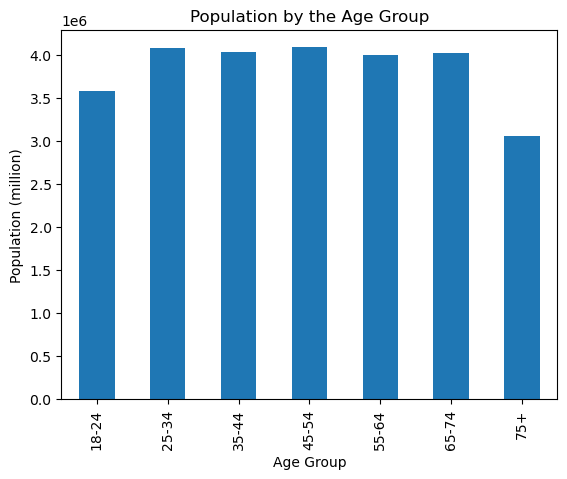

In [9]:
# Creating a bar chart 'Distribution by the Age Group'
bar_age_group = df_merge['age_group'].value_counts().sort_index().plot.bar()
plt.title("Population by the Age Group")
plt.xlabel("Age Group")
plt.ylabel("Population (million)")


In [ ]:
# Exporting chart
bar_age_group.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_group.png'))


##### Visualization: 'Number of orders by the Age Group'

In [ ]:
# Creating a bar chart 'Number of orders by the Age Group'
age_group_ords = df_merge.groupby('age_group')['order_id'].nunique()


In [ ]:
bar_age_group_ords = age_group_ords.plot.bar(color = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet', 'brown'])
plt.title("Number of orders by the Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of orders")


In [ ]:
# Exporting chart
bar_age_group_ords.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_group_ords.png'))


##### Creating a profiling variable based on 'income'

In [10]:
# Creating a subset for 'high-activity'
hi_act_custs = df_merge[df_merge['cust_activity'] == 'high-activity']

# Descriptive statistics
hi_act_custs['income'].describe()


count    3.099266e+07
mean     9.967322e+04
std      4.313928e+04
min      2.590300e+04
25%      6.728900e+04
50%      9.676500e+04
75%      1.281010e+05
max      5.939010e+05
Name: income, dtype: float64

- count: 30,992,660
- mean: 99,673 dollars
- std: 43,139 dollars
- min: 25,903 dollars
- 25%: 67,289 dollars
- 50%: 96,765 dollars
- 75%: 128,101 dollars
- max: 593,901 dollars


In [11]:
# Creating a new column, 'income_group' and classifying by 'income'
df_merge.loc[(df_merge['income'] >= 25900) & (df_merge['income'] < 100000), 'income_group'] = 'Low-income'
df_merge.loc[(df_merge['income'] >= 100000) & (df_merge['income'] <= 200000), 'income_group'] = 'Mid-income'
df_merge.loc[df_merge['income'] > 200000, 'income_group'] = 'High-income'


In [ ]:
# Checking the frequency of 'income_group'
income_by_region = pd.crosstab(df_merge['income_group'],df_merge['region'], dropna = False)
income_by_region


##### Visualization: 'Distribution of the Income Group by Regions'

In [ ]:
# Countplot chart for 'income_group' by the 'region'
bar_income_by_region = income_by_region.plot.bar(title = 'Distribution of the Income Group by Regions')
plt.xlabel("Income Group")
plt.legend(loc='upper left', bbox_to_anchor=(0, 1))


In [ ]:
# Exporting chart
bar_income_by_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_income_by_region.png'))


##### Creating a profiling variable based on certain goods in the 'department_id'

In [12]:
# Importing dataframe; 'departments_wrangled.csv'
df_dept = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'), index_col = False)


In [ ]:
df_dept.head()

In [13]:
# Renaming column name
df_dept = df_dept.rename(columns = {'Unnamed: 0' : 'department_id'})
df_dept


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


##### Merging; df_merge and df_dept

In [ ]:
# Checking information (datatype) of 'df_dept'
df_merge.info()


In [ ]:
# Checking information (datatype) of 'df_dept'
df_dept.info()


In [14]:
# Delet merge flag
del df_merge['_merge']


In [15]:
# Combine df_merge with df_dept on 'dempartment_id'
df_merge = df_dept.merge(df_merge, on = 'department_id', indicator = True)


In [ ]:
# Checking new merged dataframe 'df_merge'
df_merge.head(60)


In [ ]:
# Checking the frequency of 'department'
df_merge['department'].value_counts(dropna = False)


##### Creating a profiling variable based on 'numb_of_dependants'

In [16]:
# Creating a subset for 'numb_of_dependants'
num_of_depends = df_merge[df_merge['cust_activity'] == 'high-activity']

# Descriptive statistics
num_of_depends['numb_of_dependants'].describe()


count    3.099266e+07
mean     1.501798e+00
std      1.118902e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.000000e+00
Name: numb_of_dependants, dtype: float64

- count: 30,992,660
- mean: 2 persons (rounded from 1.501798)
- std: 1 person (rounded from 1.118902)
- min: 0 person
- 25%: 1 person
- 50%: 2 persons
- 75%: 3 persons
- max: 3 persons

In [ ]:
# Checking the frequency of 'marital_status'
df_merge['marital_status'].value_counts(dropna = False)


In [17]:
# Creating a new column, 'family_type' and classifying by the combination of 'marital_status' and 'numb_of_dependants'
df_merge.loc[(df_merge['marital_status'].isin(['divorced/widowed','single','living with parents and siblings'])) & (df_merge['numb_of_dependants'] == 0), 'family_type'] = 'Single-family'
df_merge.loc[(df_merge['marital_status'].isin(['divorced/widowed','single','living with parents and siblings'])) & (df_merge['numb_of_dependants'] > 0), 'family_type'] = 'Single-parent-family'
df_merge.loc[(df_merge['marital_status'] == 'married') & (df_merge['numb_of_dependants'] == 0), 'family_type'] = 'Childless-family'
df_merge.loc[(df_merge['marital_status'] == 'married') & (df_merge['numb_of_dependants'] <= 2), 'family_type'] = 'Nuclear-family'
df_merge.loc[(df_merge['marital_status'] == 'married') & (df_merge['numb_of_dependants'] > 2), 'family_type'] = 'Extended-family'


In [ ]:
# Checking the frequency of 'family_type'
df_merge['family_type'].value_counts(dropna = False)


In [ ]:
# Checking counts
df_merge.shape


In [ ]:
# Checking counts
sum(df_merge['family_type'].value_counts())


##### Visualization: Stacked bar for 'department' and 'family_type'

In [ ]:
# Piovt the data to create a stacked bar chart to see relationship between 'department' and 'family_type'
fam_type_by_dept = df_merge.groupby(['department', 'family_type']).size().unstack(fill_value = 0)


In [ ]:
# Stacked Bar chart for 'family_type' by the 'department'
stkd_fam_by_dept = fam_type_by_dept.plot.bar(stacked = True, title = 'Family type by Departments')


In [ ]:
# Exporting chart
stkd_fam_by_dept.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'stkd_fam_by_dept.png'))


##### Visualization: Stacked bar for 'department' and 'age_group'

In [ ]:
# Create a crosstab to count the occurrences of age categories in each department
cross_tab = pd.crosstab(df_merge['department'], df_merge['age_group'])


In [ ]:
# Stacked Bar chart for 'age_group' by the 'department'
plt.figure(figsize=(12, 6))
stkd_age_by_dept = cross_tab.plot(kind='bar', stacked=True, title='Age group by Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.legend(title='Age group')


In [ ]:
# Exporting chart
stkd_age_by_dept.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'stkd_age_by_dept.png'))


##### Visualization: Countplot chart for 'region' and 'family_type'

In [ ]:
# Create a countplot to visualize the distribution of 'family_type' by the 'region'
plt.figure(figsize = (10, 6))
cntplt_fam_type = sns.countplot(x='region', hue='family_type', data = df_merge, palette = 'Set2')
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Family type by Region')


In [ ]:
# Exporting chart
cntplt_fam_type.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'cntplt_fam_type.png'))


##### 7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

##### Aggregate variables on 'region'

In [18]:
# max, mean, min on a 'age_group' for usage frequency and expenditure.
region_agg = df_merge.groupby('region').agg({'order_id': 'count', 'days_since_prior_order': ['min', 'mean', 'max'], 'prices': ['min', 'mean', 'max']})


In [ ]:
region_agg


##### Aggregate variables on 'age_group'

In [19]:
# max, mean, min on a 'age_group' for usage frequency and expenditure.
age_grp_agg = df_merge.groupby('age_group').agg({'order_id': 'count', 'days_since_prior_order': ['min', 'mean', 'max'], 'prices': ['min', 'mean', 'max']})


In [ ]:
age_grp_agg


##### Aggregate variables on 'income_group'

In [20]:
# max, mean, min on a 'income_group' for usage frequency and expenditure.
income_grp_agg = df_merge.groupby('income_group').agg({'order_id': 'count', 'days_since_prior_order': ['min', 'mean', 'max'], 'prices': ['min', 'mean', 'max']})


In [ ]:
income_grp_agg


##### Aggregate variables on 'numb_of_dependants'

In [21]:
# max, mean, min on a 'numb_of_dependants' for usage frequency and expenditure.
num_of_depend_agg = df_merge.groupby('numb_of_dependants').agg({'order_id': 'count', 'days_since_prior_order': ['min', 'mean', 'max'], 'prices': ['min', 'mean', 'max']})


In [ ]:
num_of_depend_agg


##### Aggregate variables on 'family_type' and 'department'

In [22]:
# max, mean, min on 'family_type' and 'department' for usage frequency and expenditure.
fam_type_dept_agg = df_merge.groupby(['family_type', 'department']).agg({'order_id': 'count', 'days_since_prior_order': ['min', 'mean', 'max'], 'prices': ['min', 'mean', 'max']})


In [ ]:
fam_type_dept_agg.head(60)


##### 8. Compare your customer profiles (family_type) with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.
-------------------------- & -------------------------- 
##### 9. Produce suitable charts to illustrate your results and export them in your project folder.

##### Age group by region

In [25]:
# Checking 'age' by 'region'
age_by_region = pd.crosstab(df_merge['age_group'], df_merge['region'], dropna = False)
age_by_region


region,Midwest,Northeast,South,West
age_group,,,,
18-24,828336,631117,1219351,897474
25-34,950395,720829,1362220,1045281
35-44,971808,673500,1364612,1021376
45-54,970681,725884,1321249,1065542
55-64,925138,699028,1340432,1028378
65-74,946509,730501,1308261,1037577
75+,711893,544002,1025470,771414


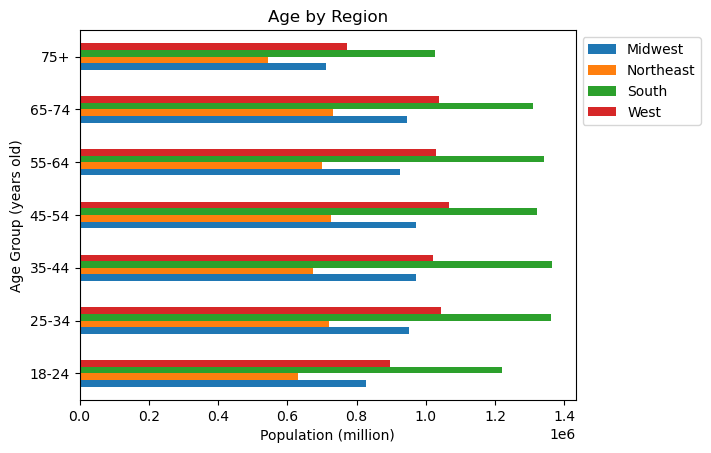

In [105]:
# Vizualization
bar_age_by_region = age_by_region.plot.barh()
plt.title("Age by Region")
plt.xlabel("Population (million)")
plt.ylabel("Age Group (years old)")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))


In [31]:
# Exporting chart
bar_age_by_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_by_region.png'))


##### Income by region

In [32]:
# Checking 'age' by 'region'
income_by_region = pd.crosstab(df_merge['income_group'], df_merge['region'], dropna = False)
income_by_region


region,Midwest,Northeast,South,West
income_group,,,,
High-income,65328,41144,84908,67212
Low-income,4061049,3097363,5931734,4516729
Mid-income,3477433,2589840,4784968,3716504


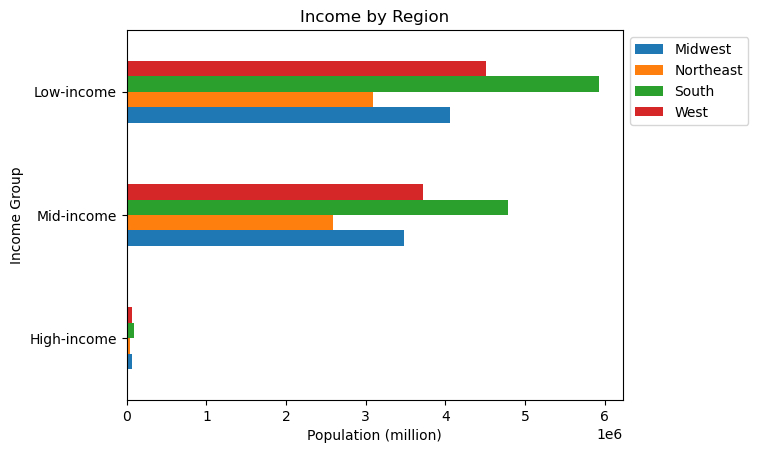

In [106]:
# Vizualization
bar_income_by_region = income_by_region.sort_values(by = ['West']).plot.barh()
plt.title("Income by Region")
plt.xlabel("Population (million)")
plt.ylabel("Income Group")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))


In [34]:
# Exporting chart
bar_income_by_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_income_by_region.png'))


##### Family type by region

In [36]:
# Checking 'family_type' by 'region'
fam_type_by_region = pd.crosstab(df_merge['family_type'], df_merge['region'], dropna = False)
fam_type_by_region


region,Midwest,Northeast,South,West
family_type,,,,
Extended-family,1754945,1352961,2540709,1980704
Nuclear-family,3575123,2687205,5026676,3858590
Single-family,1906957,1419701,2704175,2074364
Single-parent-family,366785,268480,530050,386787


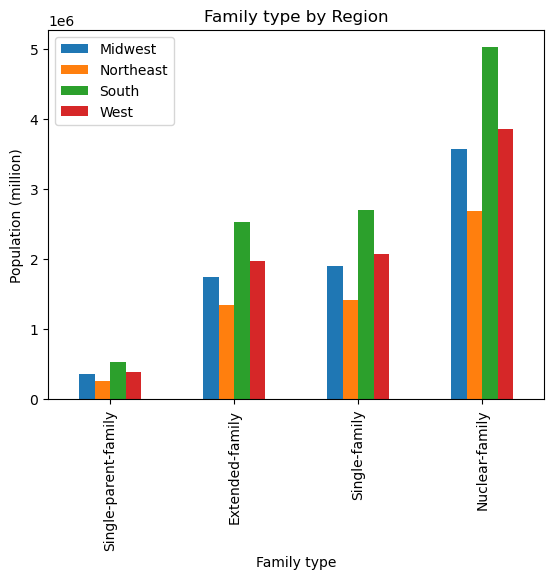

In [94]:
# Vizualization
bar_fam_type_by_region = fam_type_by_region.sort_values(by = ['West'], ascending = True).plot.bar()
plt.title("Family type by Region")
plt.xlabel("Family type")
plt.ylabel("Population (million)")
plt.legend(loc ='upper left', bbox_to_anchor=(0, 1))


In [47]:
# Exporting chart
bar_fam_type_by_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_fam_type_by_region.png'))


##### Spending by region

In [108]:
# Checking 'spending_flag' by 'region'
spend_flag_by_region = pd.crosstab(df_merge['region'], df_merge['spending_flag'], dropna = False)
spend_flag_by_region


spending_flag,High spender,Low spender
region,,
Midwest,156308,7447502
Northeast,108363,5619984
South,210508,10591102
West,160931,8139514


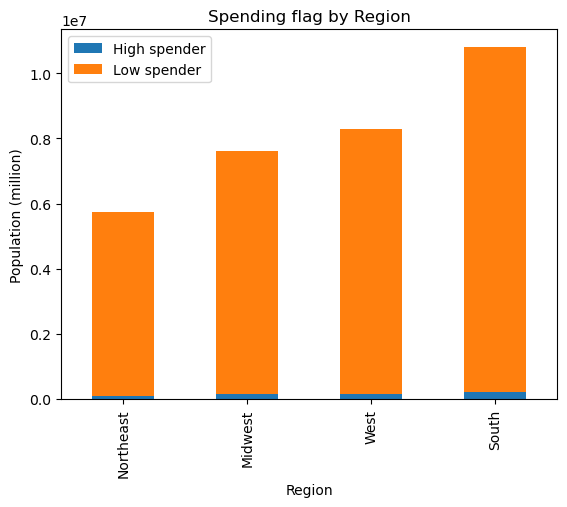

In [110]:
# Vizualization
bar_spend_flag_by_region = spend_flag_by_region.sort_values(by = ['Low spender'], ascending = True).plot.bar(stacked = True)
plt.title("Spending flag by Region")
plt.xlabel("Region")
plt.ylabel("Population (million)")
plt.legend(loc ='upper left', bbox_to_anchor=(0, 1))


In [56]:
# Exporting chart
bar_spend_flag_by_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_spend_flag_by_region.png'))


##### Department by Age

In [64]:
# Checking 'department' by 'age'
dept_by_age = pd.crosstab(df_merge['department'], df_merge['age_group'], dropna = False)
dept_by_age


age_group,18-24,25-34,35-44,45-54,55-64,65-74,75+
department,,,,,,,
alcohol,18561,20138,18639,19764,19656,18898,13937
babies,47389,51918,56233,55177,51570,50475,39000
bakery,129877,148519,145011,147498,144665,143907,111266
beverages,292007,333283,329562,341134,334092,334963,253864
breakfast,79759,89569,86693,90103,87649,85362,67182
bulk,3872,4316,4169,4404,4172,4274,3343
canned goods,117855,135812,132665,133808,131211,132937,99827
dairy eggs,598669,688577,672178,679201,661226,672157,505722
deli,115149,132456,130556,131304,129890,130281,98815


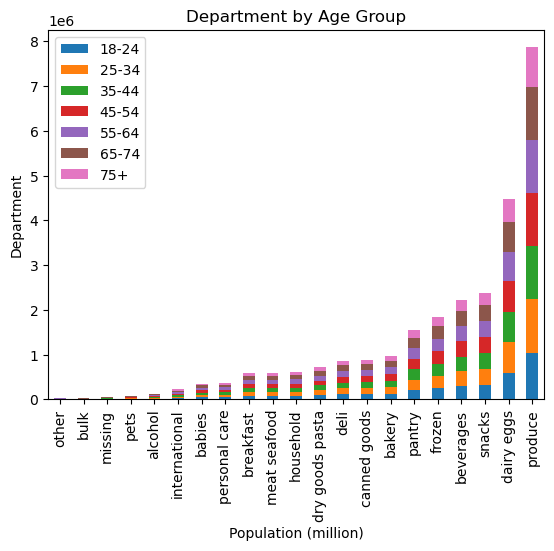

In [83]:
# Vizualization
stkd_dept_by_age = dept_by_age.sort_values(by = ['75+'], ascending = True).plot.bar(stacked = True)
plt.title("Department by Age Group")
plt.xlabel("Population (million)")
plt.ylabel("Department")
plt.legend(loc ='upper left', bbox_to_anchor=(0, 1))


In [69]:
# Exporting chart
stkd_dept_by_age.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'stkd_dept_by_age.png'))


##### Department by Income

In [71]:
# Checking 'department' by 'income'
dept_by_incom_grp = pd.crosstab(df_merge['department'], df_merge['income_group'], dropna = False)
dept_by_incom_grp


income_group,High-income,Low-income,Mid-income
department,,,
alcohol,6201,80977,66565
babies,2150,221463,200189
bakery,12820,625839,538128
beverages,24958,1514686,1148515
breakfast,6672,396772,307203
bulk,27,19882,14664
canned goods,9292,558468,500298
dairy eggs,45045,2905069,2463902
deli,7421,569133,474695


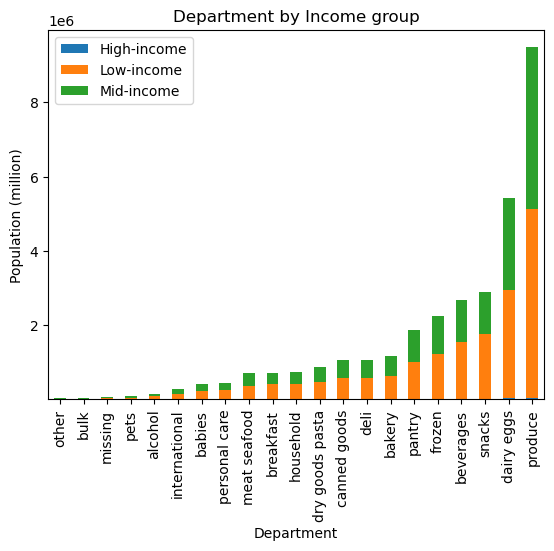

In [76]:
# Vizualization
stkd_dept_by_incom_grp = dept_by_incom_grp.sort_values(by = ['Low-income'], ascending = True).plot.bar(stacked = True)
plt.title("Department by Income group")
plt.xlabel("Department")
plt.ylabel("Population (million)")
plt.legend(loc ='upper left', bbox_to_anchor=(0, 1))


In [77]:
# Exporting chart
stkd_dept_by_incom_grp.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'stkd_dept_by_age.png'))


##### Department by Family type

In [111]:
# Checking 'department' by 'family_type'
dept_by_fam_type = pd.crosstab(df_merge['department'], df_merge['family_type'], dropna = False)
dept_by_fam_type


family_type,Extended-family,Nuclear-family,Single-family,Single-parent-family
department,,,,
alcohol,36635,69068,39143,8897
babies,100156,197006,106494,20146
bakery,275266,549606,295538,56377
beverages,629512,1259566,674450,124631
breakfast,166204,332840,176557,35046
bulk,8001,16620,8278,1674
canned goods,252274,499756,264838,51190
dairy eggs,1267873,2531119,1353388,261636
deli,247641,488048,265145,50415


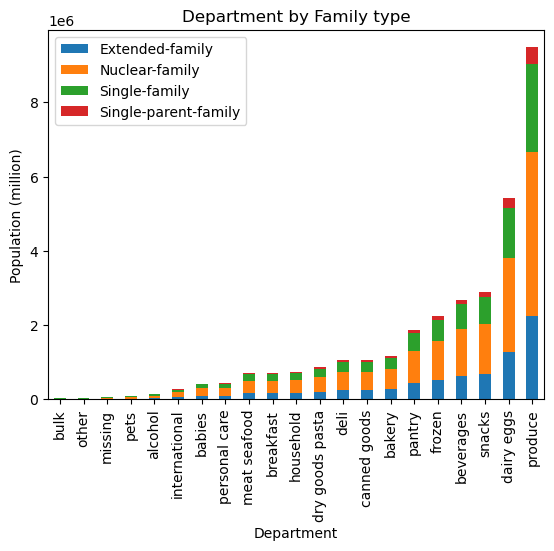

In [112]:
# Vizualization
stkd_dept_by_fam_type = dept_by_fam_type.sort_values(by = ['Single-parent-family'], ascending = True).plot.bar(stacked = True)
plt.title("Department by Family type")
plt.xlabel("Department")
plt.ylabel("Population (million)")
plt.legend(loc ='upper left', bbox_to_anchor=(0, 1))


In [113]:
# Exporting chart
stkd_dept_by_fam_type.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'stkd_dept_by_age.png'))


##### Department by Region

In [114]:
# Checking 'department' by 'region'
dept_by_region = pd.crosstab(df_merge['department'], df_merge['region'], dropna = False)
dept_by_region


region,Midwest,Northeast,South,West
department,,,,
alcohol,36195,26559,51633,39356
babies,98983,75139,143654,106026
bakery,274777,209468,390294,302248
beverages,625585,483422,898957,680195
breakfast,165269,125068,236753,183557
bulk,8193,5802,11533,9045
canned goods,250702,186755,356015,274586
dairy eggs,1267696,956809,1801966,1387545
deli,245678,186817,349419,269335


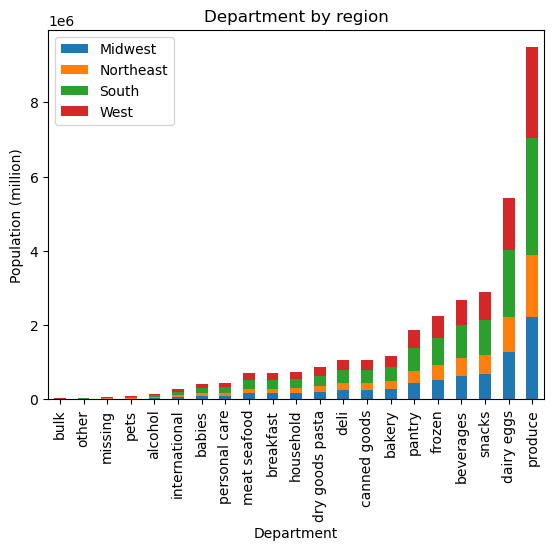

In [115]:
# Vizualization
stkd_dept_by_region = dept_by_region.sort_values(by = ['West'], ascending = True).plot.bar(stacked = True)
plt.title("Department by region")
plt.xlabel("Department")
plt.ylabel("Population (million)")
plt.legend(loc ='upper left', bbox_to_anchor=(0, 1))


In [116]:
# Exporting chart
stkd_dept_by_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'stkd_dept_by_region.png'))


##### Order hour of day by Region (stacked)

In [129]:
# Checking 'order_hour_of_day' by 'region'
ord_hr_by_region = pd.crosstab(df_merge['order_hour_of_day'], df_merge['region'], dropna = False)
ord_hr_by_region


region,Midwest,Northeast,South,West
order_hour_of_day,,,,
0,50785,38587,73351,56219
1,27378,21568,37926,28914
2,16997,12449,21994,17991
3,11917,9227,17446,12727
4,12697,9516,17981,13089
5,19872,15413,30881,21891
6,67368,50605,98769,74028
7,208452,159145,298007,226324
8,398566,305673,579649,436064


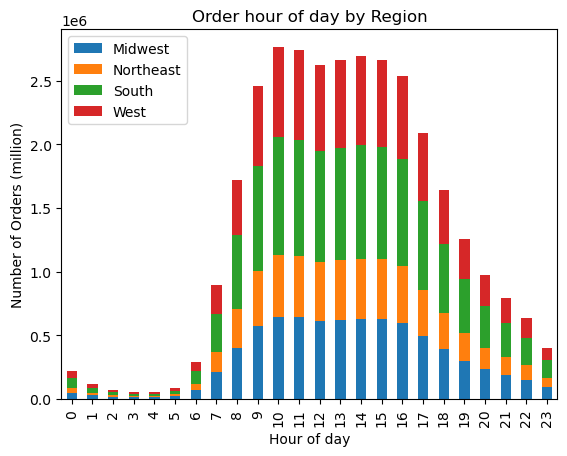

In [131]:
# Vizualization
stkd_ord_hr_by_region = ord_hr_by_region.plot.bar(stacked = True)
plt.title("Order hour of day by Region")
plt.xlabel("Hour of day")
plt.ylabel("Number of Orders (million)")
plt.legend(loc ='upper left', bbox_to_anchor=(0, 1))


In [132]:
# Exporting chart
stkd_ord_hr_by_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'stkd_ord_hr_by_region.png'))


##### Order hour of day by Region (line)

In [138]:
# Checking 'order_hour_of_day' by 'region'
ord_hr_by_region = df_merge.groupby(['region', 'order_hour_of_day'])['order_id'].nunique().reset_index()
ord_hr_by_region


,region,order_hour_of_day,order_id
0,Midwest,0,4962
1,Midwest,1,2789
2,Midwest,2,1696
3,Midwest,3,1151
4,Midwest,4,1253
...,...,...,...
91,West,19,33394
92,West,20,25097
93,West,21,18483
94,West,22,14520


In [139]:
# Pivot data
pivot_data = ord_hr_by_region.pivot(index = 'order_hour_of_day', columns='region', values='order_id')


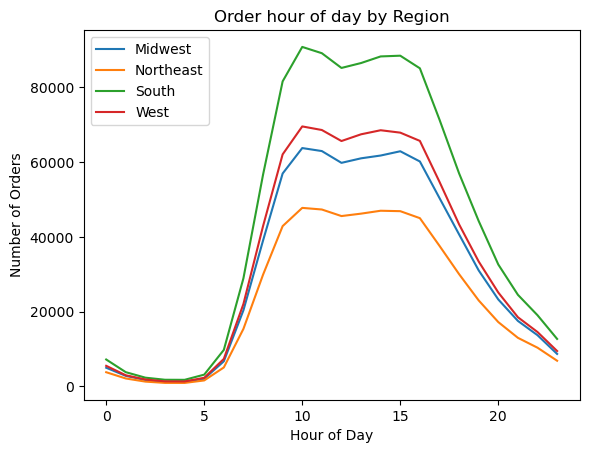

In [141]:
# Vizualization
line_ord_hr_by_region = pivot_data.plot.line()
plt.title("Order hour of day by Region")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Orders")
plt.legend(loc ='upper left', bbox_to_anchor=(0, 1))


In [142]:
# Exporting chart
line_ord_hr_by_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_ord_hr_by_region.png'))


##### Order day of week by Region (bar)

In [143]:
# Checking 'orders_day_of_week' by 'region'
ord_day_by_region = pd.crosstab(df_merge['orders_day_of_week'], df_merge['region'], dropna = False)
ord_day_by_region


region,Midwest,Northeast,South,West
orders_day_of_week,,,,
0,1461356,1098361,2054551,1595364
1,1322079,1000935,1893905,1448911
2,992673,746892,1405940,1072261
3,895896,679977,1288493,979730
4,888903,666978,1259621,971691
5,984001,747209,1401009,1077230
6,1058902,787995,1498091,1155258


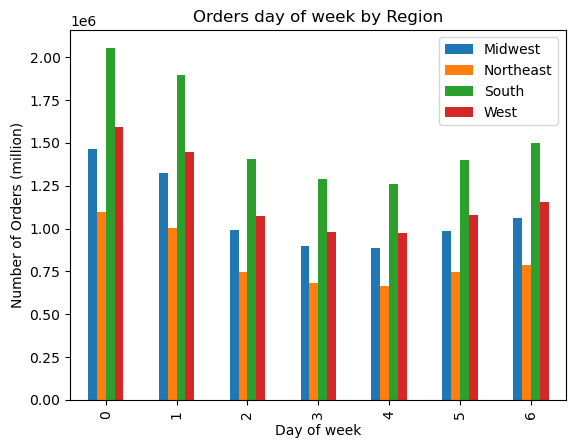

In [172]:
# Vizualization
bar_ord_day_by_region = ord_day_by_region.plot.bar()
plt.title("Orders day of week by Region")
plt.xlabel("Day of week")
plt.ylabel("Number of Orders (million)")
plt.legend(loc ='upper left', bbox_to_anchor=(0.73, 1))


In [173]:
# Exporting chart
bar_ord_day_by_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_ord_day_by_region.png'))


##### Price and Order hour of day by Region (line)

In [158]:
# Checking 'mean_price' and 'order_hour_of_day' by 'region'
prc_ord_hr_by_region = df_merge.groupby(['region', 'order_hour_of_day'])['prices'].mean().reset_index()


In [159]:
pivot_data = prc_ord_hr_by_region.pivot(index = 'order_hour_of_day', columns = 'region', values = 'prices')


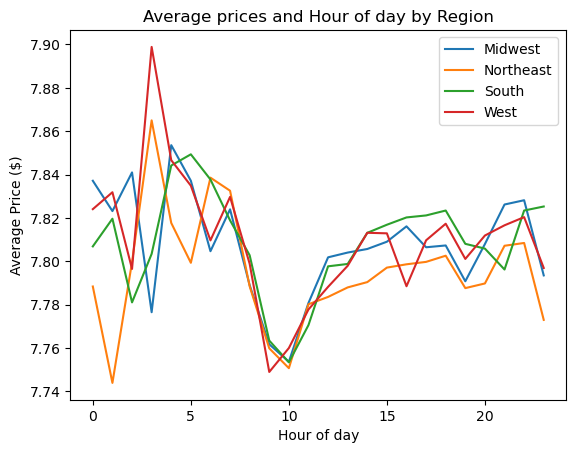

In [161]:
# Vizualization
line_prc_ord_hr_by_region = pivot_data.plot()
plt.title("Average prices and Hour of day by Region")
plt.xlabel("Hour of day")
plt.ylabel("Average Price ($)")
plt.legend(loc ='upper left', bbox_to_anchor=(0.73, 1))


In [162]:
# Exporting chart
line_prc_ord_hr_by_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_prc_ord_hr_by_region.png'))


##### Price and Order day of week by Region (line)

In [164]:
# Checking 'mean_price' and 'order_hour_of_day' by 'region'
prc_ord_day_by_region = df_merge.groupby(['region', 'orders_day_of_week'])['prices'].mean().reset_index()


In [165]:
pivot_data = prc_ord_day_by_region.pivot(index = 'orders_day_of_week', columns = 'region', values = 'prices')


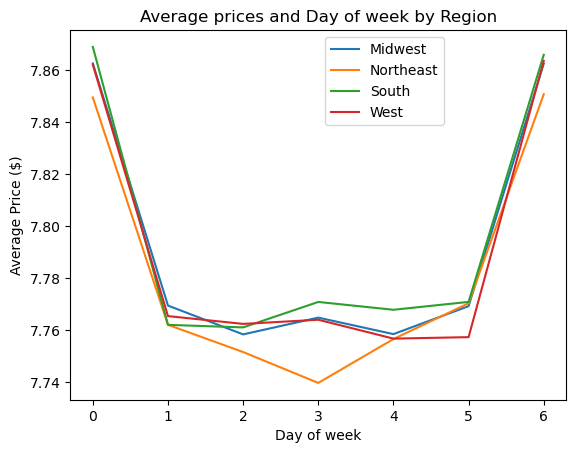

In [168]:
# Vizualization
line_prc_ord_day_by_region = pivot_data.plot()
plt.title("Average prices and Day of week by Region")
plt.xlabel("Day of week")
plt.ylabel("Average Price ($)")
plt.legend(loc ='upper left', bbox_to_anchor=(0.5, 1))


In [169]:
# Exporting chart
line_prc_ord_day_by_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_prc_ord_day_by_region.png'))


##### Order day of week by Loyalty status (bar)

In [174]:
# Checking 'orders_day_of_week' by 'region'
ord_day_by_loyal = pd.crosstab(df_merge['orders_day_of_week'], df_merge['loyalty_flag'], dropna = False)
ord_day_by_loyal


loyalty_flag,Loyal customer,New customer,Regular customer
orders_day_of_week,,,
0,1756216,1281580,3171836
1,1845387,1068423,2752020
2,1353644,815130,2048992
3,1267664,732075,1844357
4,1293242,695338,1798613
5,1458107,760345,1990997
6,1319477,896507,2284262


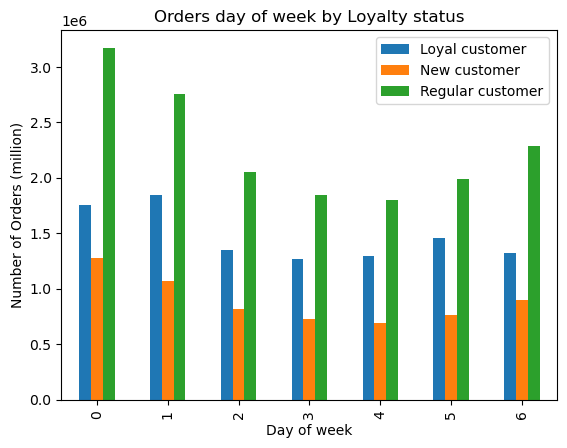

In [180]:
# Vizualization
bar_ord_day_by_loyal = ord_day_by_loyal.plot.bar()
plt.title("Orders day of week by Loyalty status")
plt.xlabel("Day of week")
plt.ylabel("Number of Orders (million)")
plt.legend(loc ='upper left', bbox_to_anchor=(0.62, 1))


In [181]:
# Exporting chart
bar_ord_day_by_loyal.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_ord_day_by_loyal.png'))


##### Order hour of day by Loyalty status (line)

In [182]:
# Checking 'orders_day_of_week' by 'region'
ord_hr_by_loyal = pd.crosstab(df_merge['order_hour_of_day'], df_merge['loyalty_flag'], dropna = False)
ord_hr_by_loyal


loyalty_flag,Loyal customer,New customer,Regular customer
order_hour_of_day,,,
0,61806,46080,111056
1,30206,26776,58804
2,17802,15946,35683
3,13387,12002,25928
4,16894,10930,25459
5,29385,16033,42639
6,112977,43410,134383
7,347031,130134,414763
8,644553,267436,807963


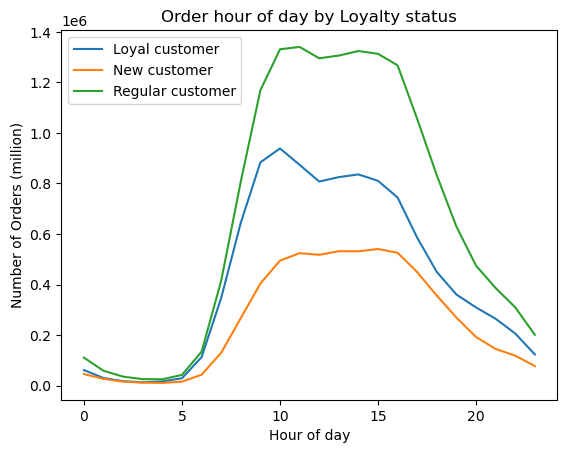

In [185]:
# Vizualization
line_ord_hr_by_loyal = ord_hr_by_loyal.plot.line()
plt.title("Order hour of day by Loyalty status")
plt.xlabel("Hour of day")
plt.ylabel("Number of Orders (million)")
plt.legend(loc ='upper left', bbox_to_anchor=(0, 1))


In [186]:
# Exporting chart
line_ord_hr_by_loyal.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_ord_hr_by_loyal.png'))


##### Department by Loyalty status (stacked bar)

In [187]:
# Checking 'orders_day_of_week' by 'region'
dept_by_loyal = pd.crosstab(df_merge['department'], df_merge['loyalty_flag'], dropna = False)
dept_by_loyal


loyalty_flag,Loyal customer,New customer,Regular customer
department,,,
alcohol,38726,37716,77301
babies,167108,60118,196576
bakery,381686,224397,570704
beverages,855024,512883,1320252
breakfast,223866,139909,346872
bulk,13834,5271,15468
canned goods,294594,236180,537284
dairy eggs,1835676,974289,2604051
deli,324046,205750,521453


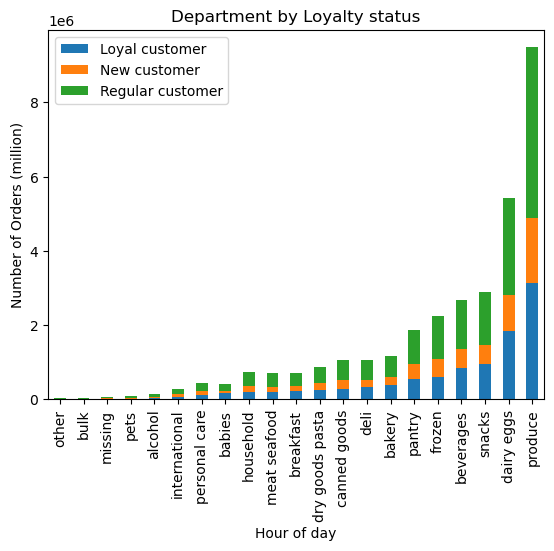

In [188]:
# Vizualization
stkd_dept_by_loyal = dept_by_loyal.sort_values(by = ['Loyal customer'], ascending = True).plot.bar(stacked = True)
plt.title("Department by Loyalty status")
plt.xlabel("Hour of day")
plt.ylabel("Number of Orders (million)")
plt.legend(loc ='upper left', bbox_to_anchor=(0, 1))


In [189]:
# Exporting chart
stkd_dept_by_loyal.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'stkd_dept_by_loyal.png'))


##### Department by Loyalty status (line)

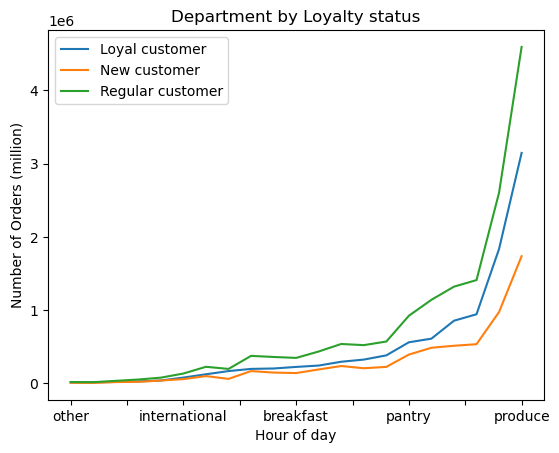

In [198]:
# Vizualization
line_dept_by_loyal = dept_by_loyal.sort_values(by = ['Loyal customer'], ascending = True).plot.line()
plt.title("Department by Loyalty status")
plt.xlabel("Hour of day")
plt.ylabel("Number of Orders (million)")
plt.legend(loc ='upper left', bbox_to_anchor=(0, 1))


In [191]:
# Exporting chart
line_dept_by_loyal.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_dept_by_loyal.png'))


##### Day of week by Loyalty status (line)

In [209]:
# Checking 'orders_day_of_week' by 'loyalty_flag'
day_by_loyal = df_merge.groupby(['loyalty_flag', 'orders_day_of_week'])['prices'].mean().reset_index()
day_by_loyal


,loyalty_flag,orders_day_of_week,prices
0,Loyal customer,0,7.865236
1,Loyal customer,1,7.729847
2,Loyal customer,2,7.746588
3,Loyal customer,3,7.748574
4,Loyal customer,4,7.755418
5,Loyal customer,5,7.732425
6,Loyal customer,6,7.865179
7,New customer,0,7.856841
8,New customer,1,7.799255
9,New customer,2,7.769971


In [ ]:
pivot_data = day_by_loyal.pivot(index = 'orders_day_of_week', columns = 'loyalty_flag', values = 'prices')


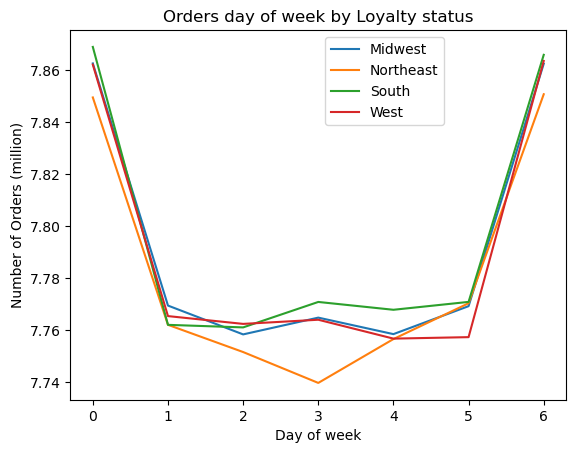

In [210]:
# Vizualization
line_day_by_loyal = pivot_data.plot()
plt.title("Orders day of week by Loyalty status")
plt.xlabel("Day of week")
plt.ylabel("Number of Orders (million)")
plt.legend(loc ='upper left', bbox_to_anchor=(0.5, 1))


In [211]:
# Exporting chart
line_day_by_loyal.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_day_by_loyal.png'))


##### Price by Hour of day & Loyalty status (line)

In [212]:
# Checking 'orders_day_of_week' by 'loyalty_flag'
hr_by_loyal = df_merge.groupby(['loyalty_flag', 'order_hour_of_day'])['prices'].mean().reset_index()
hr_by_loyal


,loyalty_flag,order_hour_of_day,prices
0,Loyal customer,0,7.815186
1,Loyal customer,1,7.754220
2,Loyal customer,2,7.796787
3,Loyal customer,3,7.902019
4,Loyal customer,4,7.815694
...,...,...,...
67,Regular customer,19,7.805047
68,Regular customer,20,7.803021
69,Regular customer,21,7.808413
70,Regular customer,22,7.828393


In [213]:
pivot_data = hr_by_loyal.pivot(index = 'order_hour_of_day', columns = 'loyalty_flag', values = 'prices')


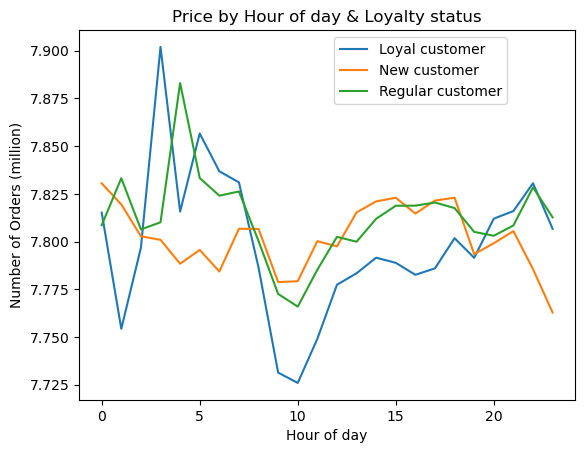

In [214]:
# Vizualization
line_hr_by_loyal = pivot_data.plot()
plt.title("Price by Hour of day & Loyalty status")
plt.xlabel("Hour of day")
plt.ylabel("Number of Orders (million)")
plt.legend(loc ='upper left', bbox_to_anchor=(0.5, 1))


In [215]:
# Exporting chart
line_hr_by_loyal.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_hr_by_loyal.png'))


##### Days since last order by Loyalty status (stacked bar)

In [226]:
# Checking 'days_since_prior_order' by 'loyalty_flag'
days_last_ord_by_loyal = pd.crosstab(df_merge['days_since_prior_order'], df_merge['loyalty_flag'], dropna = False)
days_last_ord_by_loyal


loyalty_flag,Loyal customer,New customer,Regular customer
days_since_prior_order,,,
0.0,239837,50876,157960
1.0,626582,52172,262343
2.0,973967,73058,417829
3.0,1187079,102584,588180
4.0,1204041,128724,747742
5.0,1075789,163142,887470
6.0,1092051,230300,1197529
7.0,1352699,350120,1776613
8.0,644033,223640,1066130


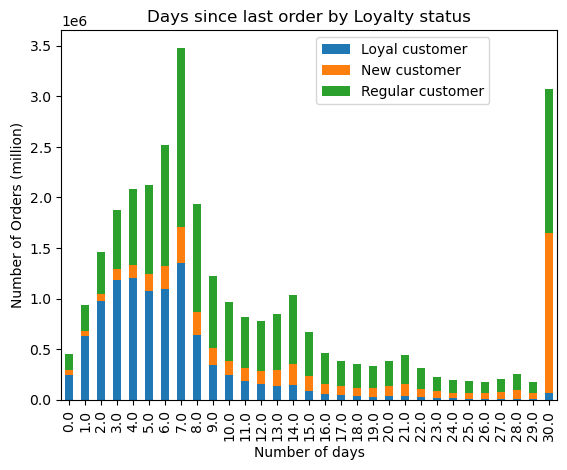

In [239]:
# Vizualization
stkd_days_last_ord_by_loyal = days_last_ord_by_loyal.plot.bar(stacked = True)
plt.title("Days since last order by Loyalty status")
plt.xlabel("Number of days")
plt.ylabel("Number of Orders (million)")
plt.legend(loc ='upper left', bbox_to_anchor=(0.5, 1))


In [240]:
# Exporting chart
stkd_days_last_ord_by_loyal.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'sktd_days_last_ord_by_loyal.png'))


##### Income group by Loyalty status (bar)

In [241]:
# Checking 'days_since_prior_order' by 'loyalty_flag'
income_by_loyal = pd.crosstab(df_merge['income_group'], df_merge['loyalty_flag'], dropna = False)
income_by_loyal


loyalty_flag,Loyal customer,New customer,Regular customer
income_group,,,
High-income,99564,25824,133204
Low-income,5531670,3496095,8579110
Mid-income,4662503,2727479,7178763


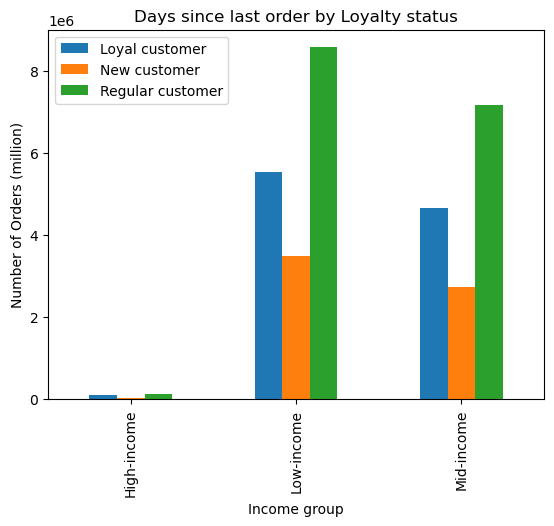

In [243]:
# Vizualization
bar_income_by_loyal = income_by_loyal.plot.bar()
plt.title("Income group by Loyalty status")
plt.title("Days since last order by Loyalty status")
plt.xlabel("Income group")
plt.ylabel("Number of Orders (million)")
plt.legend(loc ='upper left', bbox_to_anchor=(0, 1))


In [244]:
# Exporting chart
bar_income_by_loyal.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_income_by_loyal.png'))


##### Number of orders by Age group & Family type (stacked bar)

In [245]:
# Checking 'days_since_prior_order' by 'loyalty_flag'
num_ords_by_age_fam = pd.crosstab(df_merge['family_type'], df_merge['age_group'])
num_ords_by_age_fam


age_group,18-24,25-34,35-44,45-54,55-64,65-74,75+
family_type,,,,,,,
Extended-family,397287,1018264,1003411,1040517,1015066,1021035,755007
Nuclear-family,762571,2029675,2014094,2035226,1942857,2010789,1537638
Single-family,864318,1030786,1013791,1007613,1035053,991024,760134
Single-parent-family,1552102,0,0,0,0,0,0


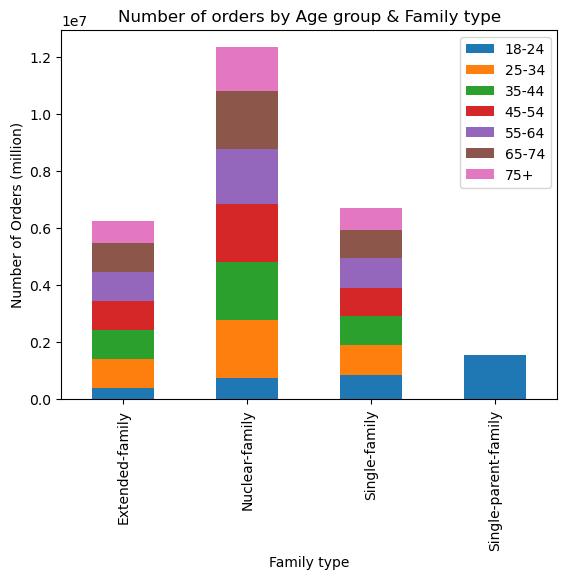

In [251]:
# Vizualization
stkd_num_ords_by_age_fam = num_ords_by_age_fam.plot.bar(stacked = True)
plt.title("Number of orders by Age group & Family type")
plt.xlabel("Family type")
plt.ylabel("Number of Orders (million)")
plt.legend(loc ='upper left', bbox_to_anchor=(0.79, 1))


In [252]:
# Exporting chart
stkd_num_ords_by_age_fam.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'stkd_num_ords_by_age_fam.png'))


##### Order day of the week by Age group & Family type (heatmap)

In [258]:
# Checking 'orders_day_of_week' by 'age_group' and 'family_type'
pivot_tab = pd.pivot_table(df_merge, values = 'order_id', index = ['age_group', 'family_type'], columns = 'orders_day_of_week', aggfunc = 'count')
pivot_tab


orders_day_of_week                   0       1       2       3       4  \
age_group family_type                                                    
18-24     Extended-family        78425   67535   50239   47615   45348   
          Nuclear-family        147854  132457   99055   90428   86466   
          Single-family         161703  156758  111757  101100  103048   
          Single-parent-family  295482  271659  201723  182508  180984   
25-34     Extended-family       193731  182015  134944  120050  118885   
          Nuclear-family        395113  354359  259012  237001  239242   
          Single-family         198290  188908  133855  122024  119601   
35-44     Extended-family       199440  169920  129689  117099  114864   
          Nuclear-family        384197  353077  261008  240379  236321   
          Single-family         196388  178078  130312  119405  117312   
45-54     Extended-family       197661  182660  137042  121034  123873   
          Nuclear-family        381975  352776  268640  242787  239214   
          Single-family         193864  173400  131570  118690  118167   
55-64     Extended-family       192949  184134  133577  120643  117815   
          Nuclear-family        371992  334238  251935  229419  228055   
          Single-family         199427  182154  133110  122236  118972   
65-74     Extended-family       193433  177266  135358  122146  118069   
          Nuclear-family        382888  343569  260716  237440  235776   
          Single-family         185884  174235  131475  120401  114441   
75+       Extended-family       148127  134041   98175   86591   86136   
          Nuclear-family        293783  266914  197624  183541  181001   
          Single-family         148969  129232   95919   90887   86235   

orders_day_of_week                   5       6  
age_group family_type                           
18-24     Extended-family        52679   55446  
          Nuclear-family        100861  105450  
          Single-family         111456  118496  
          Single-parent-family  203382  216364  
25-34     Extended-family       130392  138247  
          Nuclear-family        266359  278589  
          Single-family         130912  137196  
35-44     Extended-family       128361  144038  
          Nuclear-family        260137  278975  
          Single-family         134149  138147  
45-54     Extended-family       133774  144473  
          Nuclear-family        265734  284100  
          Single-family         134014  137908  
55-64     Extended-family       127636  138312  
          Nuclear-family        253103  274115  
          Single-family         136661  142493  
65-74     Extended-family       131687  143076  
          Nuclear-family        264531  285869  
          Single-family         127145  137443  
75+       Extended-family        97459  104478  
          Nuclear-family        198090  216685  
          Single-family         100385  108507

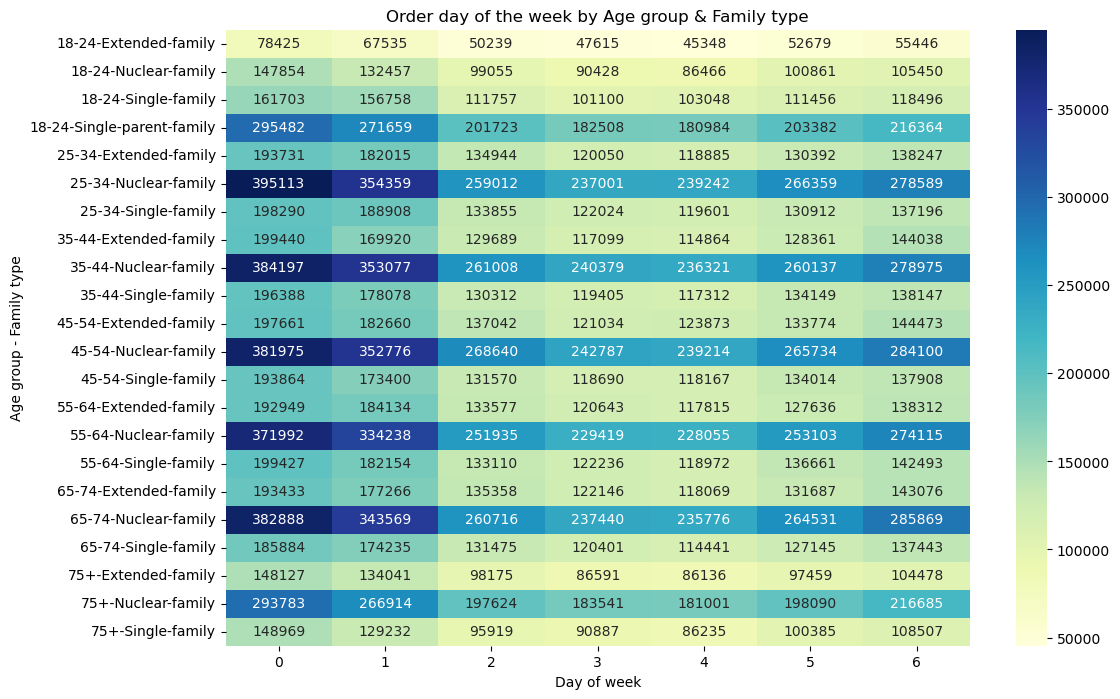

In [270]:
# Vizualization
plt.figure(figsize = (12, 8))
hmap_day_by_age_fam = sns.heatmap(pivot_tab, cmap = 'YlGnBu', annot = True, fmt = 'd', cbar = True)
plt.title("Order day of the week by Age group & Family type")
plt.xlabel("Day of week")
plt.ylabel("Age group - Family type")
plt.show()


In [271]:
# Exporting chart
hmap_day_by_age_fam.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hmap_day_by_age_fam.png'))


##### Order hour of day by Age group & Family type (heatmap)

In [272]:
# Checking 'order_hour_of_day' by 'age_group' and 'family_type'
pivot_tab2 = pd.pivot_table(df_merge, values = 'order_id', index = ['age_group', 'family_type'], columns = 'order_hour_of_day', aggfunc = 'count')
pivot_tab2


order_hour_of_day                  0     1     2     3     4     5      6   \
age_group family_type                                                        
18-24     Extended-family        3310  1547   924   562   771  1266   4101   
          Nuclear-family         4915  2963  1921  1245  1307  2161   6861   
          Single-family          5821  3183  2027  1196  1527  2375   8839   
          Single-parent-family  11054  5951  3754  2603  2992  4558  15506   
25-34     Extended-family        7434  3459  2145  1419  1728  2358   7961   
          Nuclear-family        14333  7146  4584  3568  3158  5394  18275   
          Single-family          6717  3826  1945  1783  1581  2693   9471   
35-44     Extended-family        6428  3898  2425  2025  1668  2942  10068   
          Nuclear-family        14737  7768  4923  3194  2829  5081  16673   
          Single-family          7384  3472  1818  1253  1521  2534   8290   
45-54     Extended-family        6618  3234  2170  1586  1444  2618   8256   
          Nuclear-family        13195  7041  3926  2730  3220  5226  17230   
          Single-family          6814  3576  2247  1745  1550  2656   9576   
55-64     Extended-family        6871  4063  1932  1642  1932  2858   9999   
          Nuclear-family        13446  6495  3887  3004  3779  5566  16649   
          Single-family          6962  3746  2462  1622  1593  2940   8780   
65-74     Extended-family        6316  3197  1679  1378  1825  3208   9163   
          Nuclear-family        14042  7531  4215  3537  3741  5482  17690   
          Single-family          6351  3061  2212  1539  1576  2721   8353   
75+       Extended-family        4965  2869  1726  1436  1264  2327   7133   
          Nuclear-family        10350  5598  3150  2249  2534  3487  13269   
          Single-family          4801  2605  1956  1482   966  2231   7263   

order_hour_of_day                  7       8       9   ...      14      15  \
age_group family_type                                  ...                   
18-24     Extended-family       10539   21456   29106  ...   34162   34454   
          Nuclear-family        19677   41770   58958  ...   62701   61353   
          Single-family         24686   44748   64503  ...   70879   71414   
          Single-parent-family  43906   79003  114813  ...  129231  127307   
25-34     Extended-family       26104   54343   76965  ...   86802   85642   
          Nuclear-family        56036  108135  154863  ...  167270  165025   
          Single-family         28327   54124   79435  ...   85552   86802   
35-44     Extended-family       28281   51184   72481  ...   82241   82332   
          Nuclear-family        51964  104530  151186  ...  168884  165741   
          Single-family         27438   55910   78597  ...   84381   82684   
45-54     Extended-family       27404   57443   79023  ...   85714   85575   
          Nuclear-family        55091  109208  161718  ...  166277  165288   
          Single-family         25921   50474   74426  ...   84568   83317   
55-64     Extended-family       29356   54438   76317  ...   81359   83038   
          Nuclear-family        51844   99636  144248  ...  163934  164213   
          Single-family         29278   56311   78355  ...   85120   83560   
65-74     Extended-family       29317   54778   76959  ...   84728   81649   
          Nuclear-family        54657  105852  154551  ...  164555  163745   
          Single-family         29887   53976   76282  ...   79795   84006   
75+       Extended-family       20325   41872   56430  ...   65262   61817   
          Nuclear-family        43292   80786  118243  ...  128878  123461   
          Single-family         20825   39366   56877  ...   64686   60966   

order_hour_of_day                   16      17      18     19     20     21  \
age_group family_type                                                         
18-24     Extended-family        31394   25021   19646  14887  12472   9887   
          Nuclear

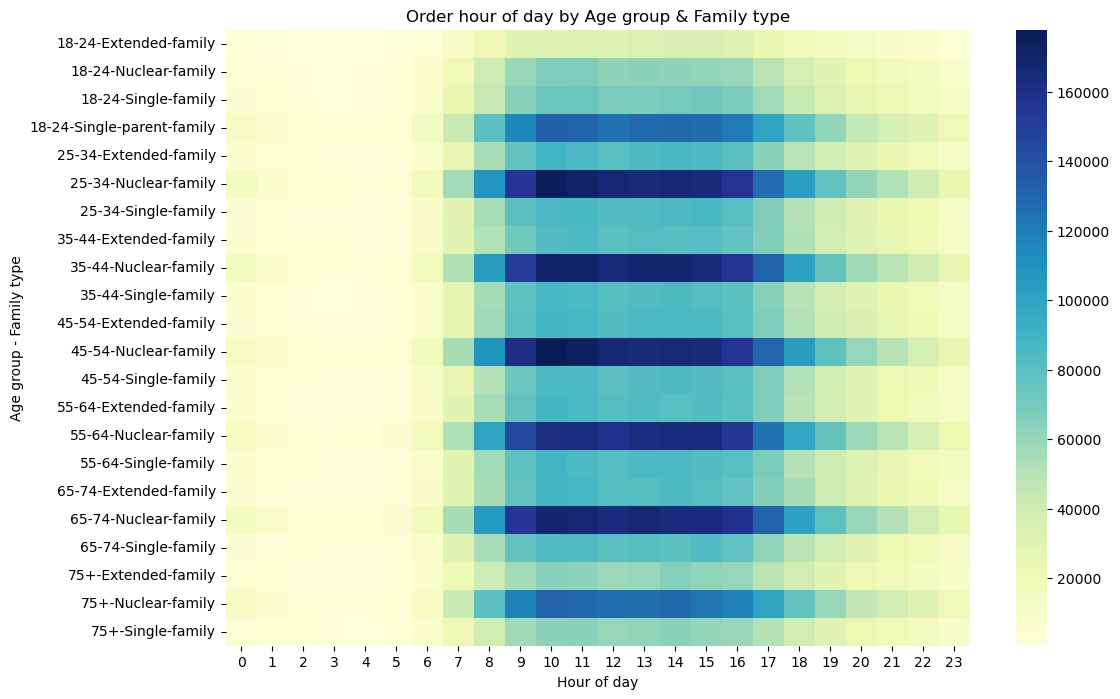

In [275]:
# Vizualization
plt.figure(figsize = (12, 8))
hmap_hr_by_age_fam = sns.heatmap(pivot_tab2, cmap = 'YlGnBu', annot = False, fmt = 'd', cbar = True)
plt.title("Order hour of day by Age group & Family type")
plt.xlabel("Hour of day")
plt.ylabel("Age group - Family type")
plt.show()


In [276]:
# Exporting chart
hmap_hr_by_age_fam.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hmap_hr_by_age_fam.png'))


##### Average price by Age group & Family type (stacked bar)

In [279]:
# Checking 'order_hour_of_day' by 'age_group' and 'family_type'
price_age_fam = df_merge.groupby(['age_group', 'family_type'])['mean_price'].mean().reset_index()
price_age_fam


,age_group,family_type,mean_price
0,18-24,Extended-family,12.033364
1,18-24,Nuclear-family,14.578329
2,18-24,Single-family,13.545315
3,18-24,Single-parent-family,10.830995
4,25-34,Extended-family,13.907353
5,25-34,Nuclear-family,11.303477
6,25-34,Single-family,11.499894
7,35-44,Extended-family,10.294213
8,35-44,Nuclear-family,12.467118
9,35-44,Single-family,11.736733


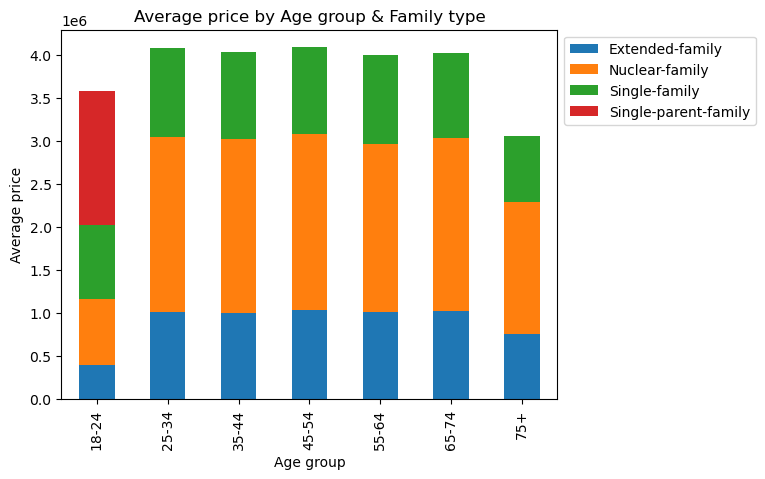

In [282]:
# Vizualization
age_fam = pd.crosstab(df_merge['age_group'], df_merge['family_type'], dropna = False)
stkd_age_fam = age_fam.plot.bar(stacked = True)
plt.title("Average price by Age group & Family type")
plt.xlabel("Age group")
plt.ylabel("Average price")
plt.legend(loc = 'upper left', bbox_to_anchor = (1, 1))


In [283]:
# Exporting chart
stkd_age_fam.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'stkd_age_fam.png'))


##### Number of orders by Department & Family type (stacked bar)

In [292]:
# Checking 'order_hour_of_day' by 'age_group' and 'family_type'
price_dept_fam = pd.crosstab(df_merge['department'], df_merge['family_type'], dropna = False)
price_dept_fam


family_type,Extended-family,Nuclear-family,Single-family,Single-parent-family
department,,,,
alcohol,36635,69068,39143,8897
babies,100156,197006,106494,20146
bakery,275266,549606,295538,56377
beverages,629512,1259566,674450,124631
breakfast,166204,332840,176557,35046
bulk,8001,16620,8278,1674
canned goods,252274,499756,264838,51190
dairy eggs,1267873,2531119,1353388,261636
deli,247641,488048,265145,50415


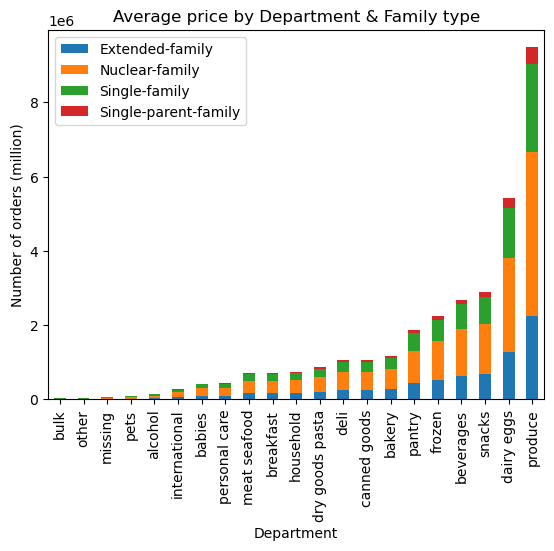

In [296]:
# Vizualization
stkd_price_dept_fam = price_dept_fam.sort_values(by = ['Single-parent-family'], ascending = True).plot.bar(stacked = True)
plt.title("Average price by Department & Family type")
plt.xlabel("Department")
plt.ylabel("Number of orders (million)")
plt.legend(loc = 'upper left', bbox_to_anchor = (0, 1))


In [294]:
# Exporting chart
stkd_price_dept_fam.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'stkd_price_dept_fam.png'))


##### Number of orders by Family type (bar)

In [297]:
# Checking 'order_hour_of_day' by 'age_group' and 'family_type'
ords_by_fam = df_merge.groupby('family_type')['order_id'].nunique()
ords_by_fam


family_type
Extended-family          756722
Nuclear-family          1500237
Single-family            805270
Single-parent-family     152632
Name: order_id, dtype: int64

Text(0, 0.5, 'Number of orders (million)')

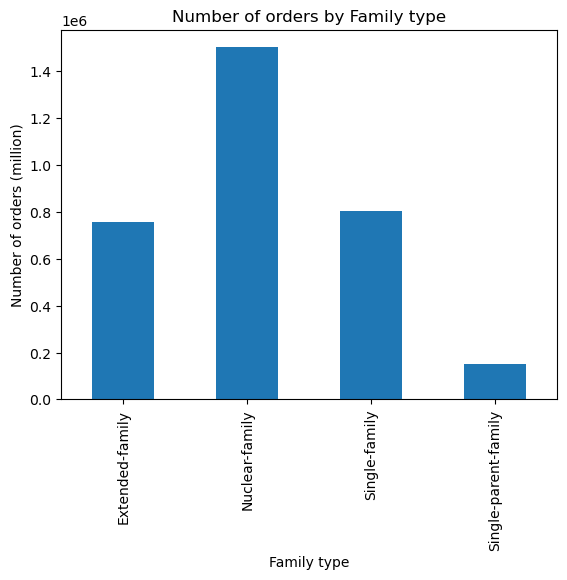

In [301]:
# Vizualization
bar_ords_by_fam = ords_by_fam.plot.bar()
plt.title("Number of orders by Family type")
plt.xlabel("Family type")
plt.ylabel("Number of orders (million)")


In [302]:
# Exporting chart
bar_ords_by_fam.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_ords_by_fam.png'))


##### 10. Tidy up your script, export your final data set, and save your notebook.

In [304]:
# Export new dataframe as a pickle file
df_merge.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'ords_prods_cstmr_dept_merged_updated_091223.pkl'))
